In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import string
import tensorflow as tf

from tensorflow.keras.layers import GRU , LSTM , GlobalAveragePooling1D , Dense  ,Dropout
from tensorflow.keras.layers import TextVectorization , Input , Embedding , Flatten , BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [5]:
df = pd.read_csv('/content/drive/MyDrive/datasets/IMDB Dataset.csv')
df.tail(3)

,review,sentiment
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

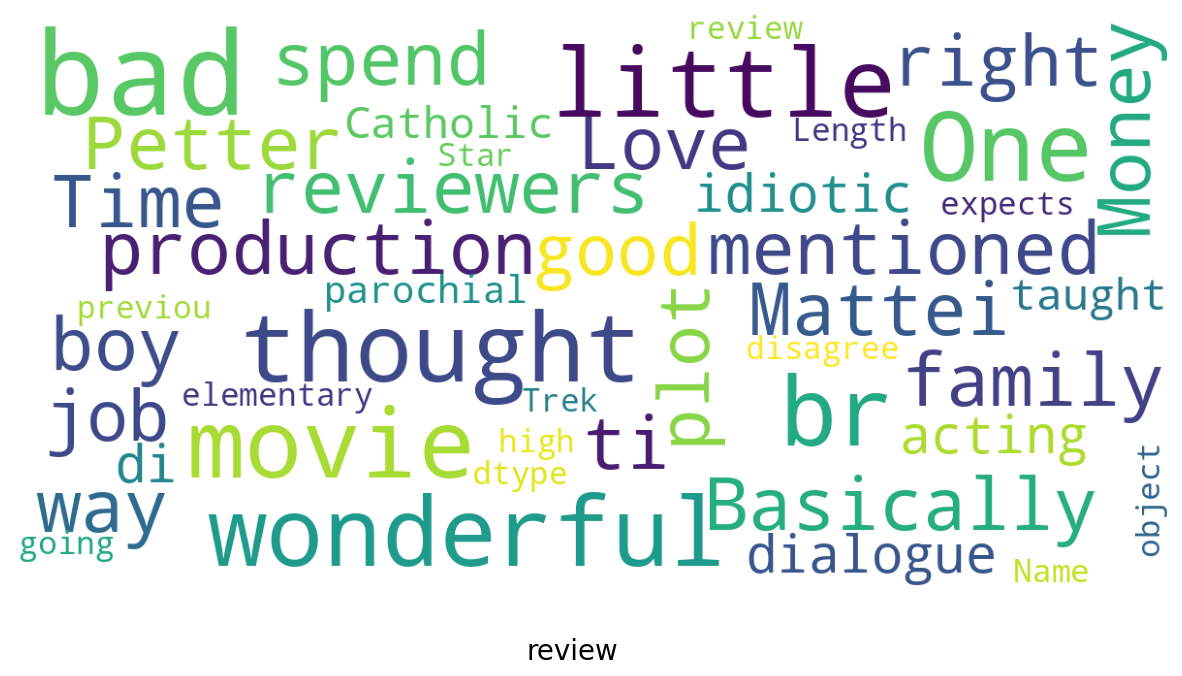

In [8]:
from wordcloud import WordCloud , STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data , title=None):
  wordcloud = WordCloud(
      background_color='white',
      stopwords=stopwords,
      max_words=200,
      max_font_size=40,
      scale=3,
      random_state=42
  ).generate(str(data))

  fig = plt.figure(1, figsize=(15,15))
  plt.axis('off')
  if title:
    fig.suptitle(title , fontsize=20)
    fig.subplots_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()

show_wordcloud(df['review'] , title='review')

tf.keras.layers.TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    **kwargs
)

In [9]:
txtVec = TextVectorization()

txtVec.adapt(df['review'])

In [16]:
textsize = txtVec.vocabulary_size()

In [22]:
txtVec(txtVec.get_vocabulary())

<tf.Tensor: shape=(182738, 1), dtype=int64, numpy=
array([[     0],
       [     1],
       [     2],
       ...,
       [182735],
       [182736],
       [182737]])>

In [12]:
txtVec(df['review']).numpy()

array([[  29,    5,    2, ...,    0,    0,    0],
       [   4,  385,  116, ...,    0,    0,    0],
       [  10,  195,   11, ...,    0,    0,    0],
       ...,
       [  10,  227,    4, ...,    0,    0,    0],
       [ 142,  162,    6, ...,    0,    0,    0],
       [  56,   29, 5827, ...,    0,    0,    0]])

In [23]:
txtVec

In [26]:
df['sentiment'] = df['sentiment'].map({'positive':1 , 'negative':0})

GRU



In [38]:
modelGRU = Sequential()

modelGRU.add(tf.keras.Input(shape=(1,), dtype='string'))
modelGRU.add(txtVec)
modelGRU.add(Embedding(textsize , 2))
modelGRU.add(GRU(32))
modelGRU.add(Dropout(0.4))
modelGRU.add(BatchNormalization())
modelGRU.add(Dense(4 , activation='relu'))
modelGRU.add(Dense(1  , activation= 'sigmoid'))


In [39]:
modelGRU.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

earlystoping = EarlyStopping(monitor='loss', patience=1)

gru_history = modelGRU.fit(df['review'], df['sentiment'] , batch_size=128 , validation_split=0.2,
             epochs=20, callbacks=[earlystoping]
             )

Epoch 1/20
313/313 [==============================] - 69s 209ms/step - loss: 0.6943 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy: 0.4993
Epoch 2/20
313/313 [==============================] - 55s 174ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.4993
Epoch 3/20
313/313 [==============================] - 42s 135ms/step - loss: 0.6931 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4994
Epoch 4/20
313/313 [==============================] - 38s 121ms/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4994


In [40]:
lossFun = gru_history.history['loss']
accFun = gru_history.history['accuracy']
vallosFun = gru_history.history['val_loss']
valaccFun = gru_history.history['val_accuracy']

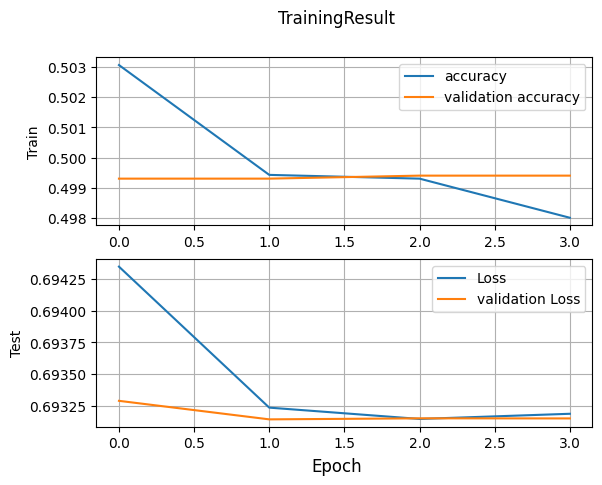

In [41]:
fig , (ax1 ,ax2) = plt.subplots(2 ,1)
fig.suptitle("TrainingResult")
fig.supxlabel('Epoch')

ax1.plot(accFun , label='accuracy')
ax1.plot(valaccFun , label='validation accuracy')
ax1.set_ylabel('Train')
ax1.grid('on')
ax1.legend()

ax2.plot(lossFun , label='Loss')
ax2.plot(vallosFun , label='validation Loss')
ax2.set_ylabel('Test')
ax2.grid('on')
ax2.legend()

plt.show()

In [42]:
modelLSTM = Sequential()

modelLSTM.add(tf.keras.Input(shape=(1,), dtype='string'))
modelLSTM.add(txtVec)
modelLSTM.add(Embedding(textsize , 2))
modelLSTM.add(LSTM(32))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(BatchNormalization())
modelLSTM.add(Dense(4 , activation='relu'))
modelLSTM.add(Dense(1  , activation= 'sigmoid'))

In [45]:
modelLSTM.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

earlystoping = EarlyStopping(monitor='loss', patience=1)

gru_history = modelLSTM.fit(df['review'], df['sentiment'] , batch_size=128 , validation_split=0.2,
             epochs=20, callbacks=[earlystoping]
             )

Epoch 1/20
313/313 [==============================] - 68s 204ms/step - loss: 0.6938 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.4985
Epoch 2/20
313/313 [==============================] - 58s 184ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 3/20
313/313 [==============================] - 54s 174ms/step - loss: 0.6928 - accuracy: 0.5019 - val_loss: 0.6933 - val_accuracy: 0.4993
Epoch 4/20
313/313 [==============================] - 35s 113ms/step - loss: 0.6920 - accuracy: 0.5025 - val_loss: 0.6935 - val_accuracy: 0.4992
Epoch 5/20
313/313 [==============================] - 30s 97ms/step - loss: 0.6985 - accuracy: 0.4992 - val_loss: 1.1198 - val_accuracy: 0.5007


In [46]:
lossFun = gru_history.history['loss']
accFun = gru_history.history['accuracy']
vallosFun = gru_history.history['val_loss']
valaccFun = gru_history.history['val_accuracy']

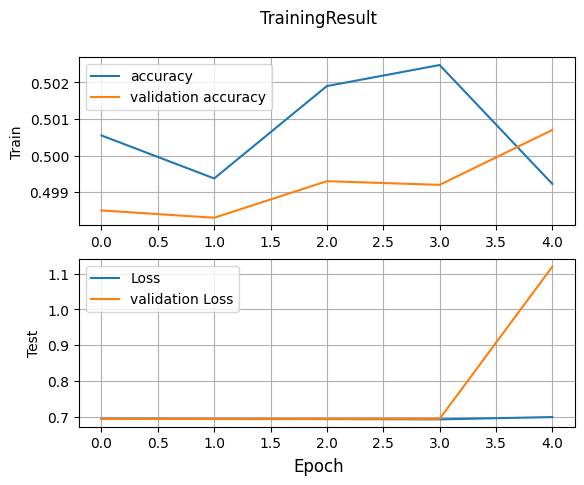

In [47]:
fig , (ax1 ,ax2) = plt.subplots(2 ,1)
fig.suptitle("TrainingResult")
fig.supxlabel('Epoch')

ax1.plot(accFun , label='accuracy')
ax1.plot(valaccFun , label='validation accuracy')
ax1.set_ylabel('Train')
ax1.grid('on')
ax1.legend()

ax2.plot(lossFun , label='Loss')
ax2.plot(vallosFun , label='validation Loss')
ax2.set_ylabel('Test')
ax2.grid('on')
ax2.legend()

plt.show()

Global Average Pooling

In [48]:
modelGAP = Sequential()

modelGAP.add(tf.keras.Input(shape=(1,), dtype='string'))
modelGAP.add(txtVec)
modelGAP.add(Embedding(textsize , 2))
modelGAP.add(GlobalAveragePooling1D())
modelGAP.add(Dense(128, activation='relu'))
modelGAP.add(Dropout(0.1))
modelGAP.add(BatchNormalization())
modelGAP.add(Dense(32, activation='relu'))
modelGAP.add(Dropout(0.1))
modelGAP.add(Dense(1, activation='sigmoid'))


In [49]:
modelGAP.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

earlystoping = EarlyStopping(monitor='loss', patience=10 )

gap_history = modelGAP.fit(df['review'], df['sentiment'] , batch_size=128 , validation_split=0.2,
             epochs=2000, callbacks=[earlystoping]
             )

Epoch 1/2000
313/313 [==============================] - 65s 189ms/step - loss: 0.4665 - accuracy: 0.7671 - val_loss: 0.5323 - val_accuracy: 0.8816
Epoch 2/2000
313/313 [==============================] - 43s 139ms/step - loss: 0.2303 - accuracy: 0.9126 - val_loss: 0.3207 - val_accuracy: 0.8661
Epoch 3/2000
313/313 [==============================] - 32s 103ms/step - loss: 0.1642 - accuracy: 0.9403 - val_loss: 0.5693 - val_accuracy: 0.8000
Epoch 4/2000
313/313 [==============================] - 27s 86ms/step - loss: 0.1115 - accuracy: 0.9617 - val_loss: 0.4340 - val_accuracy: 0.8632
Epoch 5/2000
313/313 [==============================] - 22s 71ms/step - loss: 0.0786 - accuracy: 0.9748 - val_loss: 0.3420 - val_accuracy: 0.9016
Epoch 6/2000
313/313 [==============================] - 18s 56ms/step - loss: 0.0613 - accuracy: 0.9799 - val_loss: 0.3385 - val_accuracy: 0.8974
Epoch 7/2000
313/313 [==============================] - 368s 1s/step - loss: 0.0486 - accuracy: 0.9841 - val_loss: 0.4193

In [50]:
lossFun = gap_history.history['loss']
accFun = gap_history.history['accuracy']
vallosFun = gap_history.history['val_loss']
valaccFun = gap_history.history['val_accuracy']

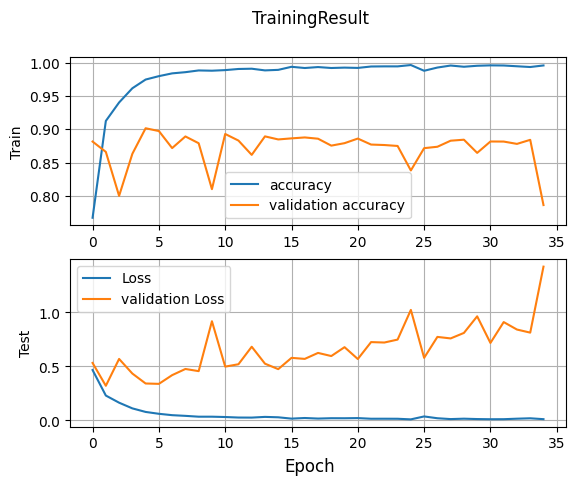

In [51]:
fig , (ax1 ,ax2) = plt.subplots(2 ,1)
fig.suptitle("TrainingResult")
fig.supxlabel('Epoch')

ax1.plot(accFun , label='accuracy')
ax1.plot(valaccFun , label='validation accuracy')
ax1.set_ylabel('Train')
ax1.grid('on')
ax1.legend()

ax2.plot(lossFun , label='Loss')
ax2.plot(vallosFun , label='validation Loss')
ax2.set_ylabel('Test')
ax2.grid('on')
ax2.legend()

plt.show()